In [82]:
import  pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error ,r2_score



In [83]:
df=pd.read_csv("/content/Salary_Data.csv")
df


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [84]:
df.shape

(30, 2)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [86]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [87]:
df.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [88]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [89]:
df.duplicated().sum()

0

In [90]:
df.isnull().sum()

,0
YearsExperience,0
Salary,0


In [91]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: >

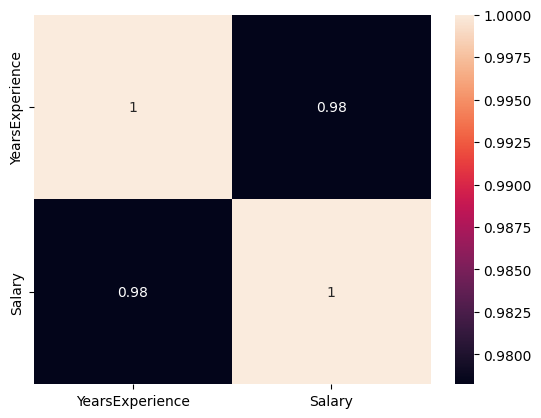

In [92]:
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='YearsExperience'>

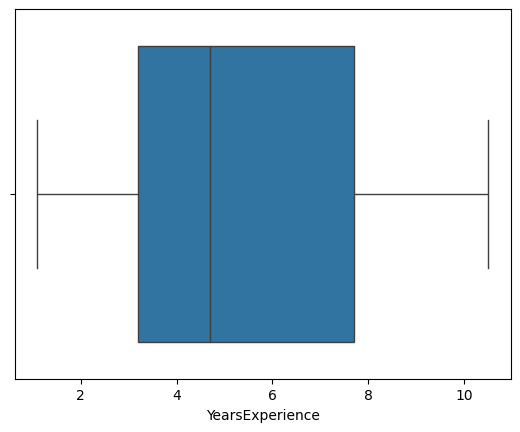

In [93]:
sns.boxplot(x=df['YearsExperience'])

<Axes: ylabel='Salary'>

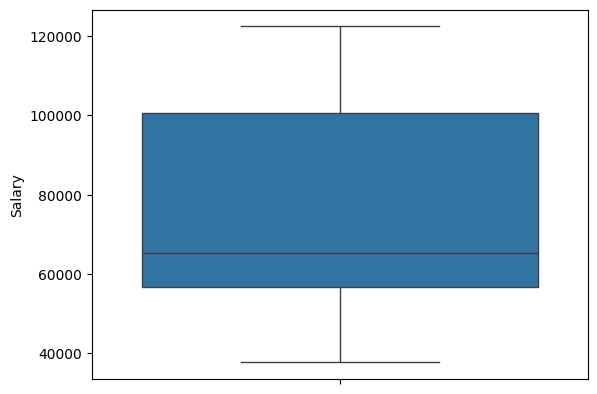

In [94]:
sns.boxplot(y=df['Salary'])

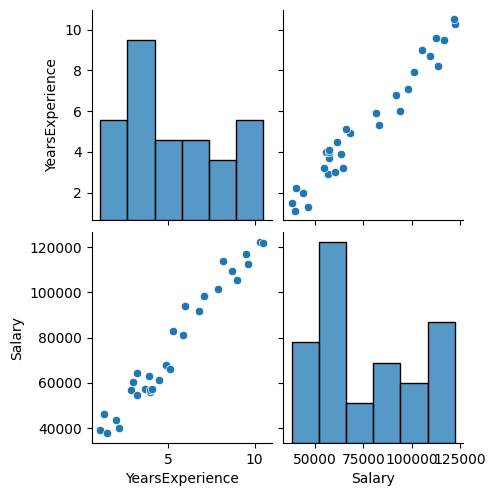

In [95]:
sns.pairplot(df)

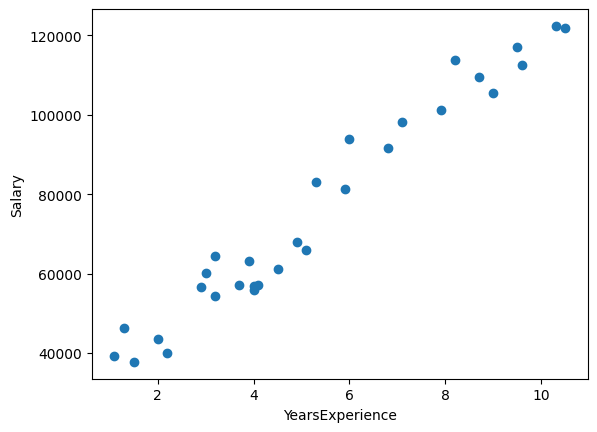

In [96]:
X=df['YearsExperience'].values
Y=df['Salary'].values
plt.scatter(X,Y)
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

In [97]:
X=df.iloc[:,:-1]

In [98]:
X

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [99]:
Y=df.iloc[:,1]

In [100]:
Y

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0
5,56642.0
6,60150.0
7,54445.0
8,64445.0
9,57189.0


In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [103]:
X_train

,YearsExperience
13,4.1
27,9.6
12,4.0
1,1.3
19,6.0
14,4.5
18,5.9
6,3.0
11,4.0
23,8.2


In [104]:
Y_train

,Salary
13,57081.0
27,112635.0
12,56957.0
1,46205.0
19,93940.0
14,61111.0
18,81363.0
6,60150.0
11,55794.0
23,113812.0


In [105]:
from sklearn.linear_model import LinearRegression

In [106]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [107]:
y_pred=model.predict(X_test)
y_pred

array([89715.76498848, 56031.05821174, 53223.99931368, 40124.39112273,
       44802.8226195 , 92522.82388655])

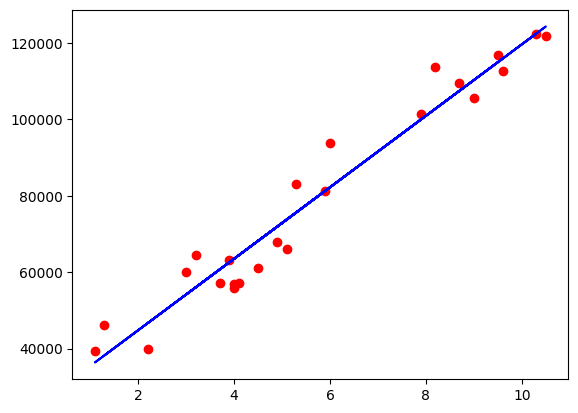

In [108]:
X=df["YearsExperience"].values
Y=df['Salary'].values
plt.scatter(X_train,Y_train ,color='red')
plt.plot(X_train,model.predict(X_train),color="blue")


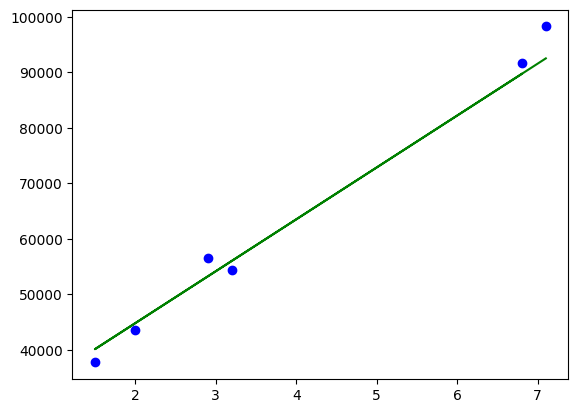

In [109]:
X=df['YearsExperience'].values
Y=df['Salary'].values
plt.scatter(X_test,Y_test,color="blue")
plt.plot(X_test,y_pred,color="green")

In [110]:
mse=mean_squared_error(Y_test,y_pred)
mse

9785570.138914324

In [111]:
r2s=r2_score(Y_test,y_pred)

In [112]:
r2s

0.9816423482070253

In [113]:
import statsmodels.api as Smf

In [114]:
X=Smf.add_constant(X)

In [115]:
model=Smf.OLS(Y,X).fit()

In [116]:
pred=model.predict(X)

In [117]:
from sklearn.linear_model import Ridge

In [118]:
reg=Ridge(alpha=1.0)

In [119]:
reg.fit(X_train,Y_train)

Ridge()

In [120]:
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [121]:
mse_train=mean_squared_error(X_train,y_pred_train)

In [122]:
mse_test=mean_squared_error(X_test,y_pred_test)

In [123]:
mse_train

6935134671.365872

In [124]:
mse_test

4372164720.308029

In [125]:
r2_train=r2_score(X_train,y_pred_train)

In [126]:
r2_test=r2_score(X_test,y_pred_test)

In [127]:
r2_train

-878716751.7220128

In [128]:
r2_test

-889002709.7093425

In [129]:
from sklearn.linear_model  import Lasso
lass=Lasso(alpha=1.0)
lass.fit(X_train,Y_train)

Lasso()

In [130]:
y_pred_train=lass.predict(X_train)


In [131]:
y_pred_test=lass.predict(X_test)

In [132]:
mse_train=mean_squared_error(X_train,y_pred_train)

In [133]:
mse_train

6942353718.468465

In [134]:
mse_test=mean_squared_error(X_test,y_pred_test)

In [136]:
mse_test

4365920089.321649

In [137]:
r2_train=r2_score(X_train,y_pred_train)

In [138]:
r2_test=r2_score(X_test,y_pred_test)

In [139]:
r2_train

-879631441.6203833

In [140]:
r2_test

-887732973.9538515